In [1]:
# Preprocessamento da base de credit-data
import pandas as pd

base = pd.read_csv('credit-data.csv')
base.loc[base.age < 0, 'age'] = 40.92
               
previsores = base.iloc[:, 1:4].values
classe = base.iloc[:, 4].values

from sklearn.preprocessing import Imputer #tratar valores nao informados
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(previsores[:, 1:4])
previsores[:, 1:4] = imputer.transform(previsores[:, 1:4])

from sklearn.preprocessing import StandardScaler #escalonar
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

from sklearn.model_selection import train_test_split #dividindo arquivo em treino e teste
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.25, random_state=0)


In [58]:
#Aplicando o Random Forest
# from sklearn.ensemble import RandomForestClassifier
# classificador=RandomForestClassifier(n_estimators=5,criterion='entropy',random_state=0)
# classificador.fit(previsores_treinamento,classe_treinamento)
# previsoes=classificador.predict(previsores_teste)

0.964

In [20]:
# Procurando o Valor Ótimo para o n_estimators
x=[]
y=[]
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
for i in range(1,100):
    classificador=RandomForestClassifier(n_estimators=i,criterion='entropy',random_state=0)
    classificador.fit(previsores_treinamento,classe_treinamento)
    previsoes=classificador.predict(previsores_teste)
    precisao=accuracy_score(classe_teste,previsoes)    
    x.append(i)
    y.append(precisao)


O valor maximo de precisao é de: 0.986000
O numero de florestas randomicas que melhor se adapta a base de dados: 56


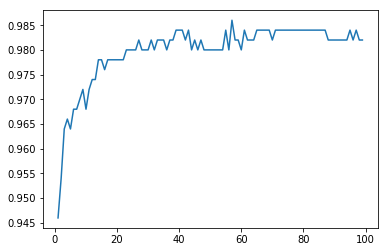

In [46]:
import matplotlib.pyplot as plt
plt.plot(x,y)
acuracia_maxima=max(y)
print("O valor maximo de precisao é de: %f"%(acuracia_maxima)) #valor max possivel de y
random_forest=y.index(acuracia_maxima)
print("O numero de florestas randomicas que melhor se adapta a base de dados: %i"%(random_forest))


In [56]:
classificador=RandomForestClassifier(n_estimators=random_forest,criterion='entropy',random_state=0)
classificador.fit(previsores_treinamento,classe_treinamento)
previsoes=classificador.predict(previsores_teste)
precisao=accuracy_score(classe_teste,previsoes) 
matriz=confusion_matrix(classe_teste,previsoes) 
print(precisao)
print(matriz)

0.98
[[433   3]
 [  7  57]]


In [61]:
y[56]

0.986